<a href="https://colab.research.google.com/github/axiom19/Fashion-Model-AI/blob/main/Fashion-model-image-gen/FMIG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <u><b>Fashion Model Image Generator</b></u>

## Section 1: Introduction
Fashion Model Image Generator is a text-to-image generator app designed specifically for fashion modeling. It allows brands and designers to create realistic images of models wearing specific clothing styles based on a given text prompt.

Using advanced diffusion models, the app transforms text descriptions into high-quality, photorealistic images, making it a powerful tool for visualizing fashion concepts and styles without the need for physical photoshoots. Users can describe the model's appearance, the clothing, and the environment, and the app will generate a corresponding image that closely matches the description.

This streamlined approach allows fashion designers and brands to quickly and easily bring their ideas to life in a virtual environment, making the Fashion TIV app an essential tool for modern fashion design and marketing.

## Section 2: Setup & Installation

In this section, we install the required libraries for our task:

<li>diffusers: Provides the diffusion models.
<li>transformers: Handles the underlying language model utilities.
<li>torch: The deep learning framework powering the model.


In [ ]:
!pip install --upgrade gradio transformers diffusers torch peft huggingface_hub sentencepiece
!pip install git+https://github.com/huggingface/diffusers.git;

In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Fri Sep  6 01:57:48 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0              44W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

Import Statements

In [3]:
import torch
from diffusers import DiffusionPipeline, FluxPipeline
import gradio as gr
import os
from huggingface_hub import login
from transformers import AutoTokenizer, AutoModel

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [4]:
# store the hugging face token
os.environ["HF_TOKEN"] = "---------TOKEN--------"

## Section 3: Login to Hugging Face Hub

We authenticate with Hugging Face using the API token to access models that may require gated access. Replace the placeholder with your actual token from Hugging Face.

In [5]:
# login to the huggingface_hub
login(token=os.environ["HF_TOKEN"])

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: fineGrained).
Your token has been saved to /root/.cache/huggingface/token
Login successful


## Section 4: Text-to-Image Generation
We generate an image based on a text prompt using the Stable Diffusion model. The generated image is then saved as generated_model_image.png for later use in the video generation step.



In [6]:
model_name = "Shakker-Labs/AWPortrait-FL"

pipe = FluxPipeline.from_pretrained(model_name, torch_dtype=torch.bfloat16)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

Fetching 23 files:   0%|          | 0/23 [00:00<?, ?it/s]

text_encoder_2/config.json:   0%|          | 0.00/834 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/273 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/652 [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

(…)t_encoder_2/model.safetensors.index.json:   0%|          | 0.00/19.9k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/588 [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.53G [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/705 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer_2/tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/20.8k [00:00<?, ?B/s]

transformer/config.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

(…)pytorch_model-00001-of-00003.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

(…)ion_pytorch_model.safetensors.index.json:   0%|          | 0.00/121k [00:00<?, ?B/s]

(…)pytorch_model-00002-of-00003.safetensors:   0%|          | 0.00/9.95G [00:00<?, ?B/s]

(…)pytorch_model-00003-of-00003.safetensors:   0%|          | 0.00/3.87G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/856 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/168M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


In [7]:
device = "cuda" if torch.cuda.is_available() else "cpu"
pipe.to(device)

FluxPipeline {
  "_class_name": "FluxPipeline",
  "_diffusers_version": "0.31.0.dev0",
  "_name_or_path": "Shakker-Labs/AWPortrait-FL",
  "scheduler": [
    "diffusers",
    "FlowMatchEulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "T5EncoderModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "T5TokenizerFast"
  ],
  "transformer": [
    "diffusers",
    "FluxTransformer2DModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [20]:
prompt = "A portrait. A soft spotlight highlights a figure in a sleek black turtleneck. The garment hugs the skin, complementing minimalist makeup. A pale grey backdrop shimmers subtly, drawing attention to the subject. Brown girl with black hair."

image = pipe(prompt,
             num_inference_steps=24,
             guidance_scale=3.5,
             width=384, height=512,
            ).images[0]

image.save(f"demo.png")

  0%|          | 0/24 [00:00<?, ?it/s]

### check the demo image generated

A portrait. A soft spotlight highlights a figure in a sleek black turtleneck. The garment hugs the skin, complementing minimalist makeup. A pale grey backdrop shimmers subtly, drawing attention to the subject. Brown girl with black hair.


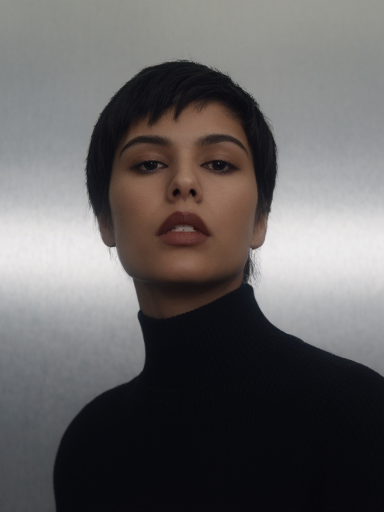

In [21]:
from PIL import Image

img = Image.open("demo.png")
print(prompt)

# show the image
img

## Section 5: Generate a Gradio based app

In [25]:
def generate_image(prompt):
    image = pipe(prompt,
             num_inference_steps=24,
             guidance_scale=3.5,
             width=384, height=512,
            ).images[0]

    return image

inputs = [gr.Textbox(label="Prompt")]
outputs = [gr.Image(type="pil", label="Generated Image")]

iface = gr.Interface(
    fn=generate_image,
    inputs=inputs,
    outputs=outputs,
    title="Fashion Model Image Generation",
    description="Generate a fashion model based on a text prompt.",
)

In [26]:
iface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://29937e6cafc293e78b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# Sample Output from the Gradio

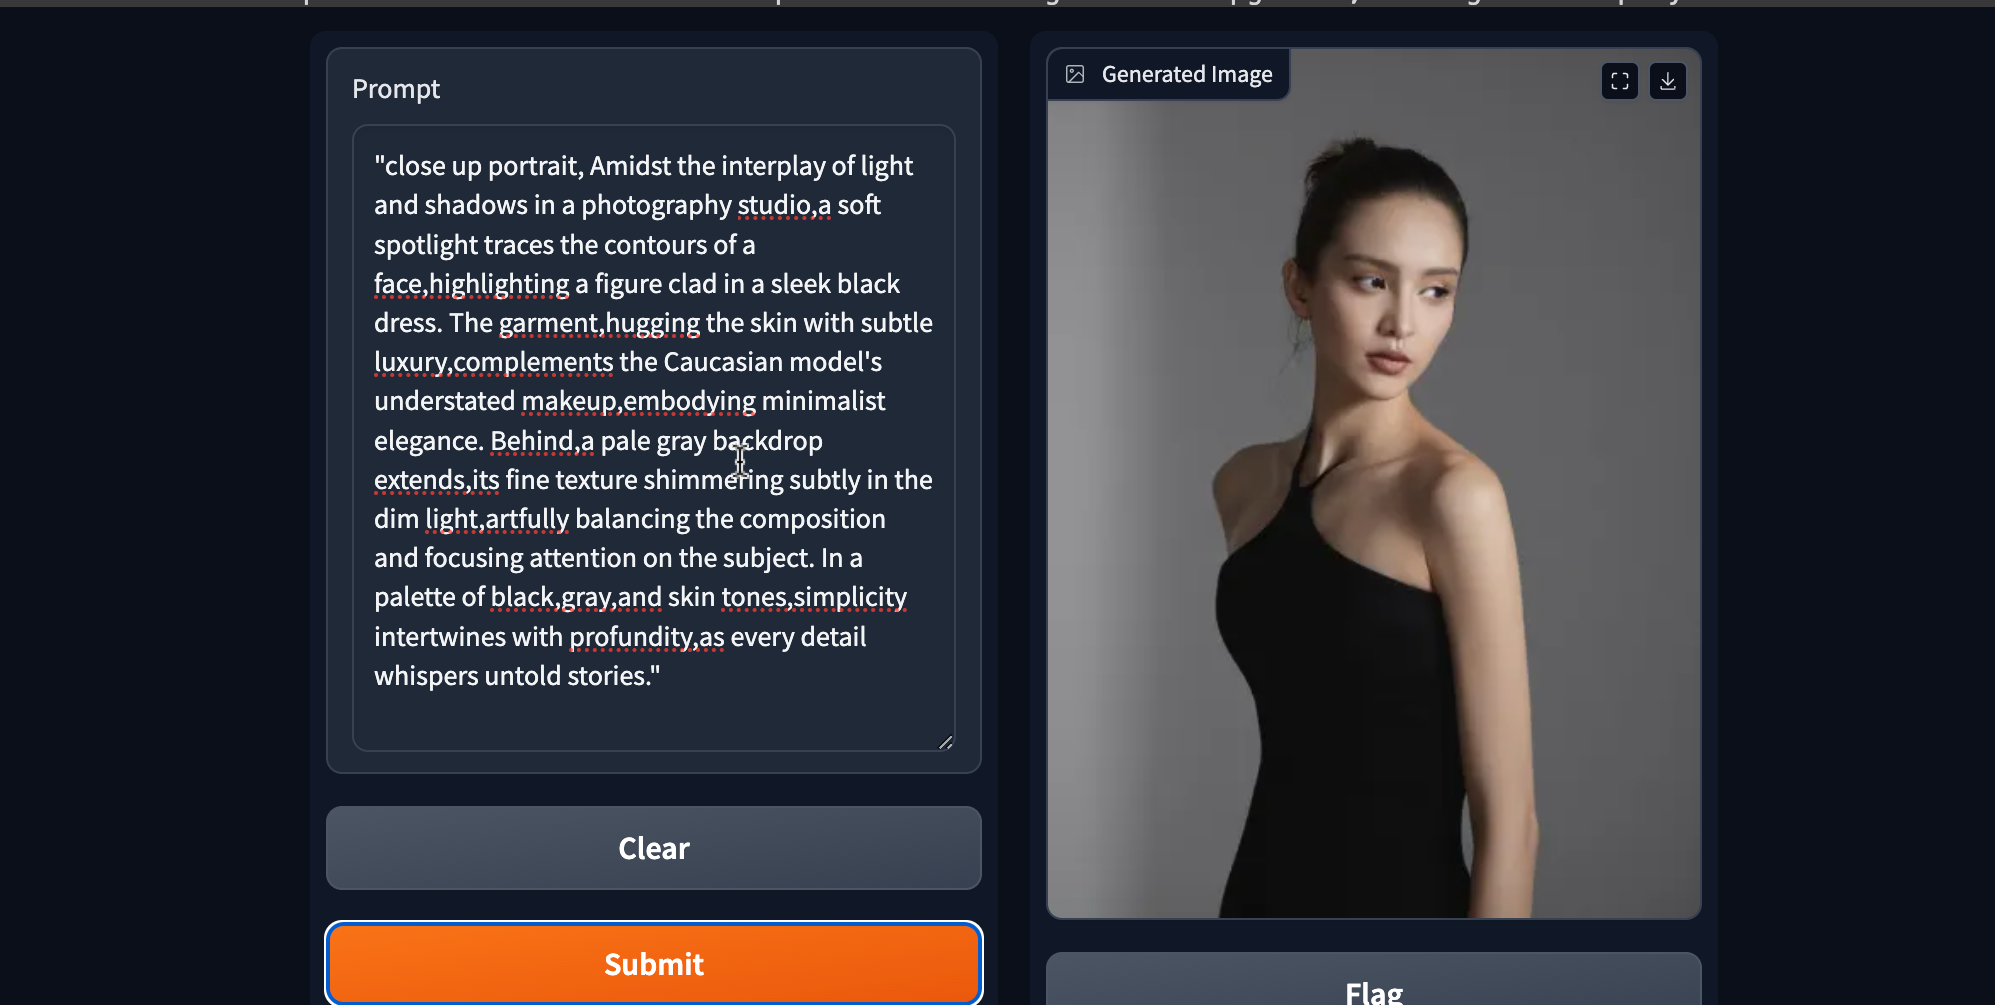